<a href="https://colab.research.google.com/github/BahodirML/ML_Projects/blob/main/Picture_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras

#creating model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

#evaluation the model
from sklearn.metrics import confusion_matrix

#saving model
import os

#data_augmentation
from keras.preprocessing.image import ImageDataGenerator

In [62]:
 from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [63]:
X_train.shape

(50000, 32, 32, 3)

In [64]:
X_test.shape

(10000, 32, 32, 3)

In [65]:
y_train.shape

(50000, 1)

In [66]:
y_test.shape

(10000, 1)

[4]


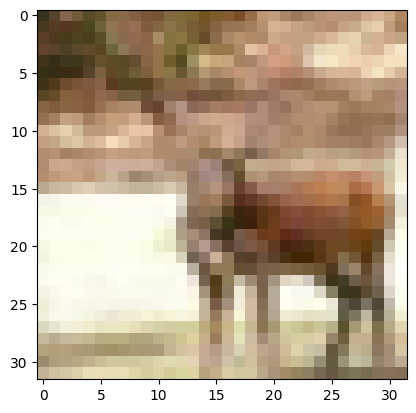

In [67]:
i = 1001
plt.imshow(X_train[i])
print(y_train[i])

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


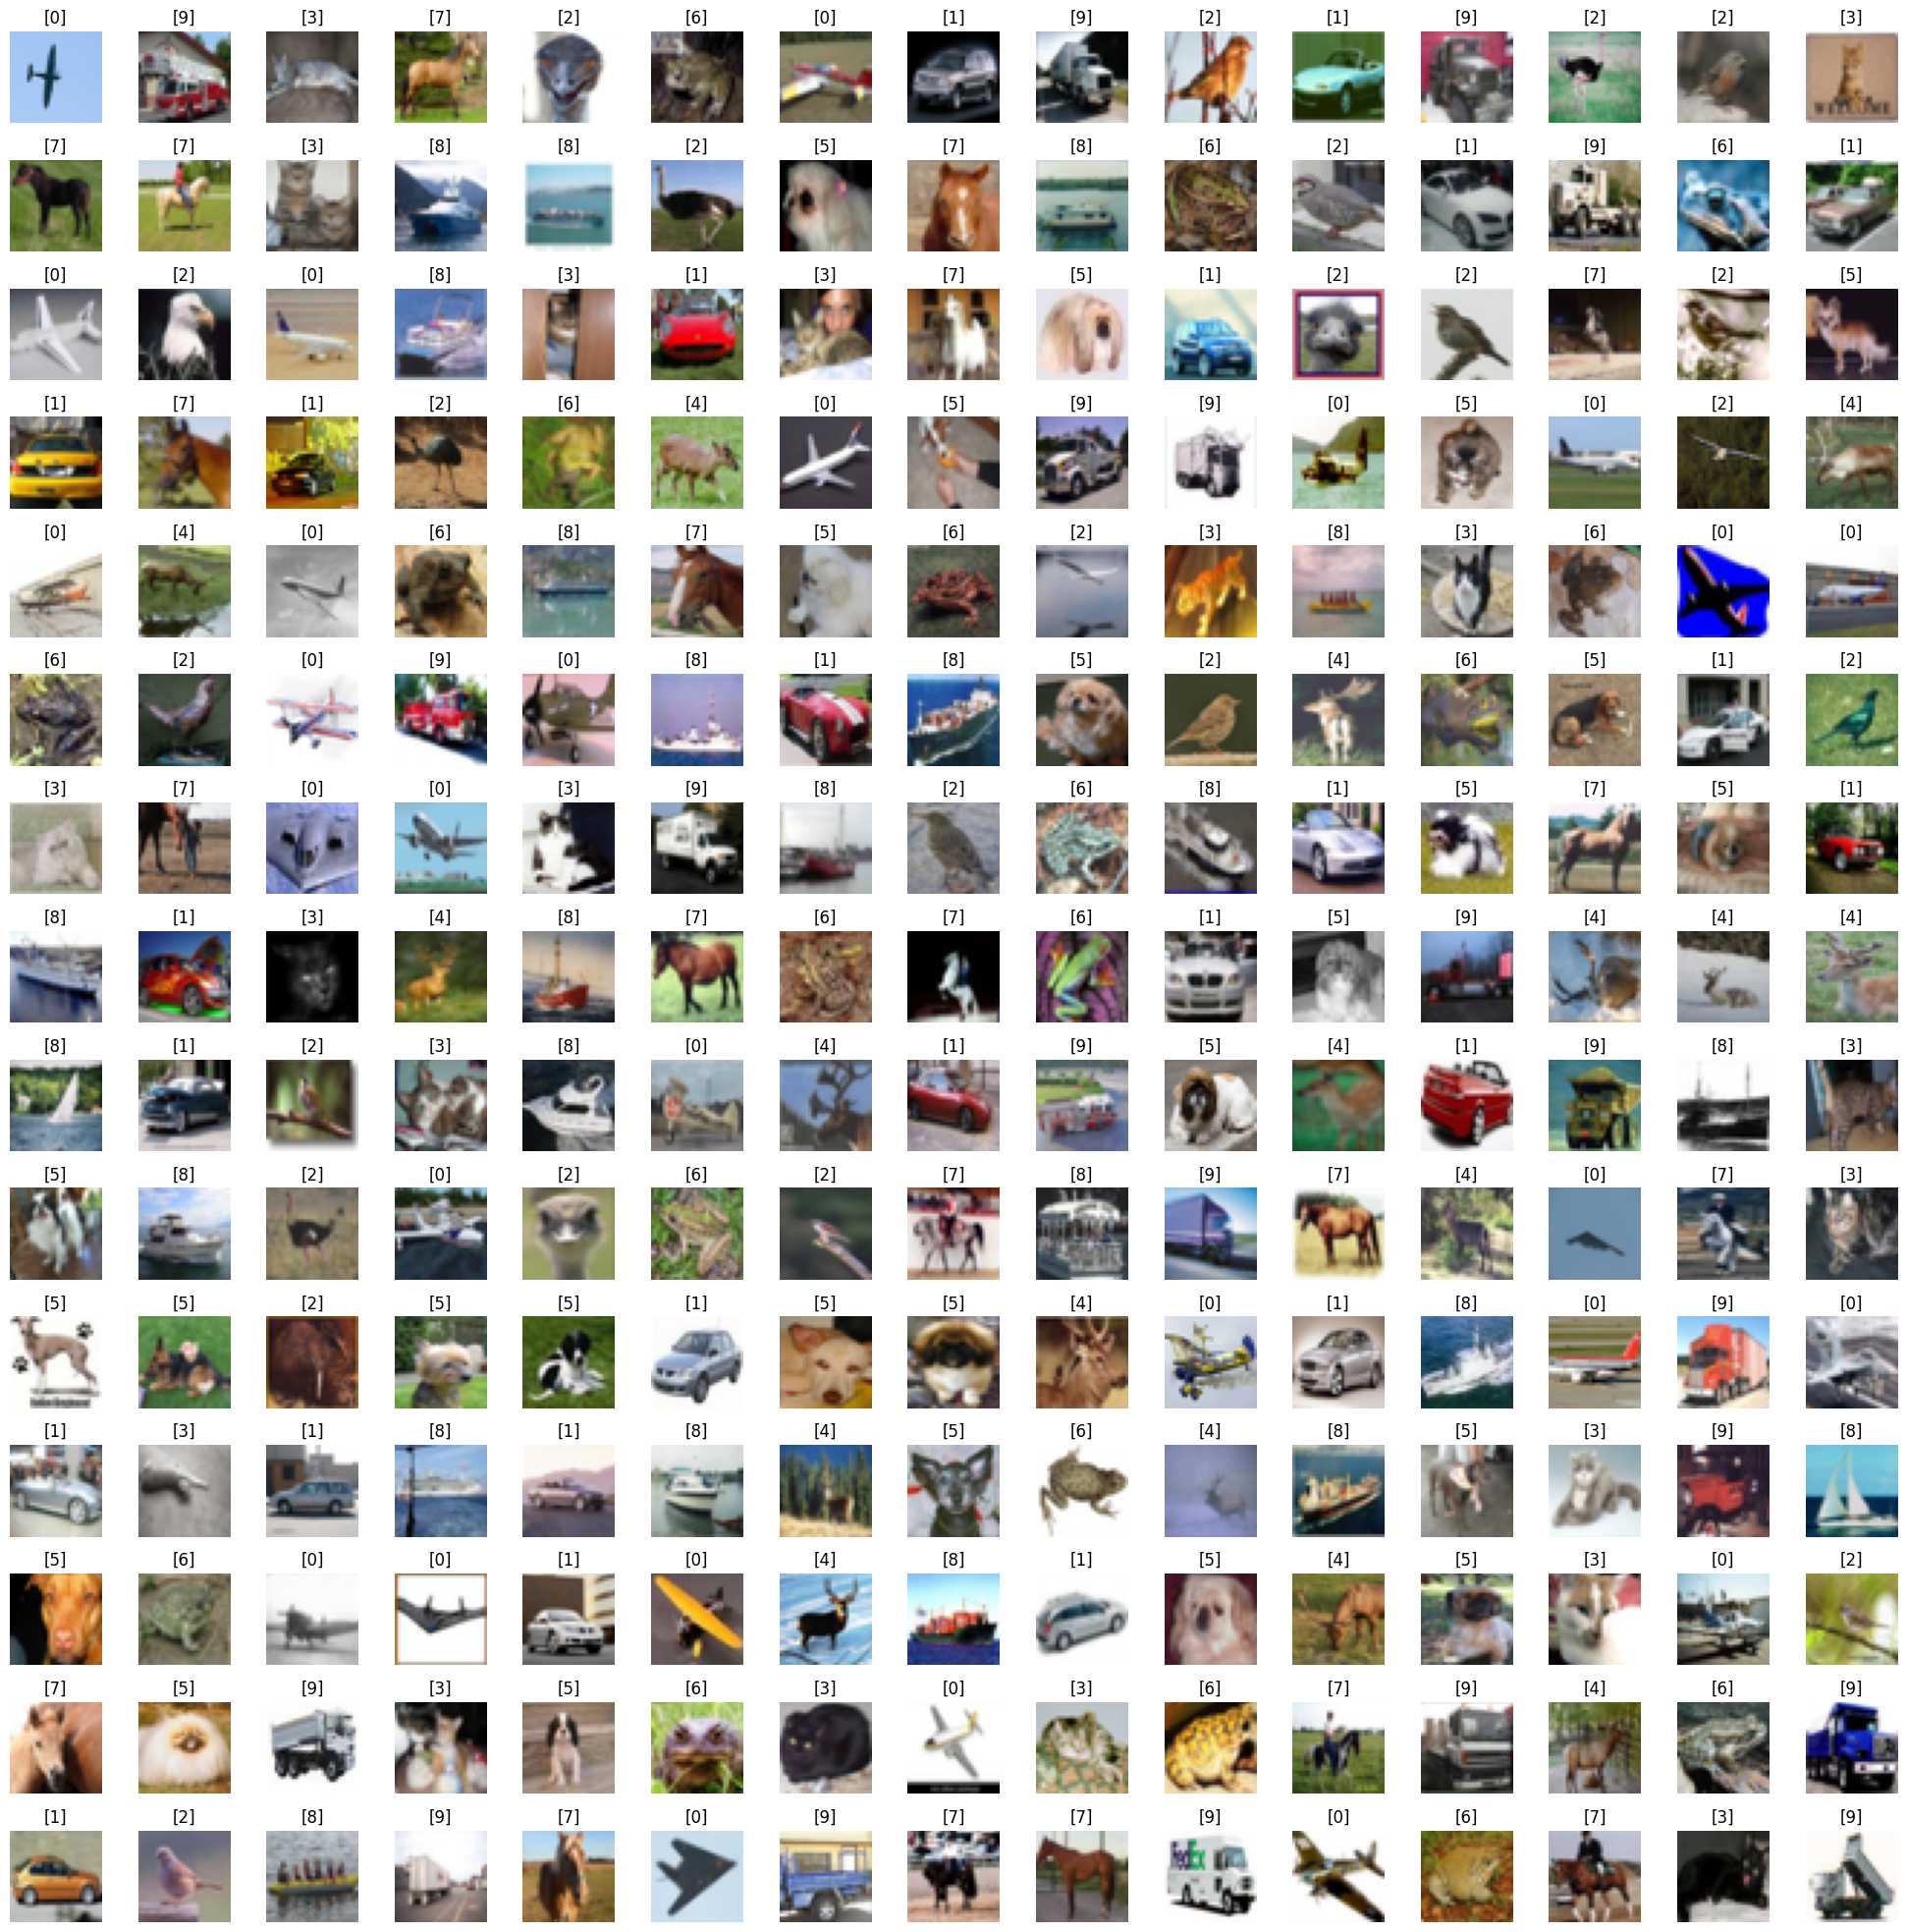

In [68]:
w_grid = 15
l_grid = 15
fig, axes = plt.subplots(l_grid, w_grid, figsize = (25,25))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, l_grid*w_grid):
  index = np.random.randint(0, n_training)
  axes[i].imshow(X_train[index])
  axes[i].set_title(y_train[index])
  axes[i].axis('off')
plt.subplots_adjust(hspace = 0.4)

In [69]:
n_training

50000

##Data preparation

In [70]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [71]:
 num_cat = 10

In [72]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [73]:
#changing y_train into binaries
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [74]:
 y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [75]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [76]:
X_train = X_train/255
X_test = X_test/255

In [77]:
 X_train.shape

(50000, 32, 32, 3)

In [78]:
Input_shape = X_train.shape[1:]
Input_shape

(32, 32, 3)

##Creating a model

In [79]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters =32, kernel_size = (3,3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters =32, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.3))


cnn_model.add(Conv2D(filters =64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters =64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.2))

cnn_model.add(Flatten())

cnn_model.add(Dense(units=512, activation = 'relu'))

cnn_model.add(Dense(units=512, activation = 'relu'))

cnn_model.add(Dense(units =10, activation = 'softmax'))

In [80]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.RMSprop(lr = 0.001), metrics = ['accuracy'] )

In [81]:
X_train.shape

(50000, 32, 32, 3)

In [82]:
history = cnn_model.fit(X_train, y_train, batch_size=32, epochs=10, shuffle=True)


Epoch 1/10
1563/1563 [==============================] - 11s 6ms/step - loss: 1.5925 - accuracy: 0.4226
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1550 - accuracy: 0.5932
Epoch 3/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9785 - accuracy: 0.6596
Epoch 4/10
1563/1563 [==============================] - 9s 5ms/step - loss: 0.8869 - accuracy: 0.6957
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8383 - accuracy: 0.7157
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8024 - accuracy: 0.7297
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7713 - accuracy: 0.7434
Epoch 8/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7562 - accuracy: 0.7478
Epoch 9/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7261 - accuracy: 0.7603
Epoch 10/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0

#Evaluating the model

In [83]:
evaluation = cnn_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9030 - accuracy: 0.7162


In [84]:
predicted_probabilities = cnn_model.predict(X_test)
predicted_classes = np.argmax(predicted_probabilities, axis=-1)

313/313 [==============================] - 1s 2ms/step


In [85]:
y_test = y_test.argmax(1)
y_test

array([3, 8, 8, ..., 5, 1, 7])

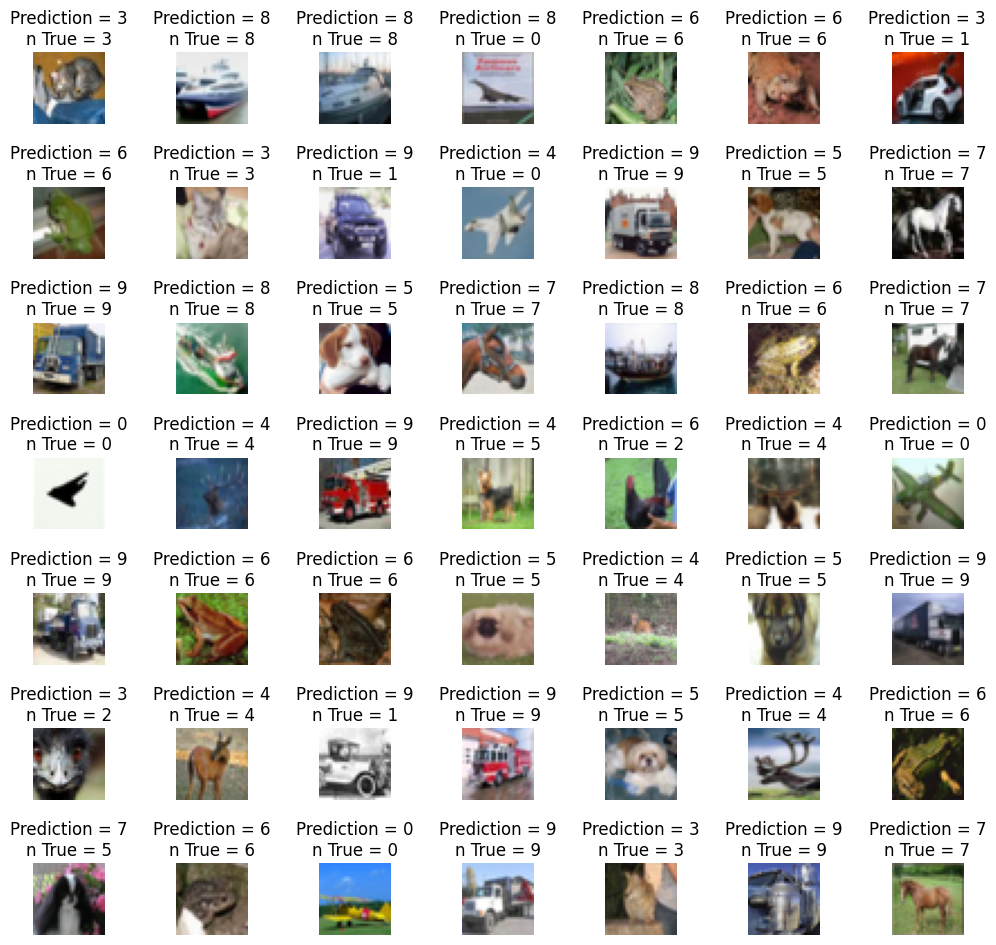

In [86]:
L=7
W = 7
fig, axes = plt.subplots(L,W, figsize = (12,12))
axes= axes.ravel()

for i in np.arange(0, L*W):
  axes[i].imshow(X_test[i])
  axes[i].set_title('Prediction = {}\nn True = {}'.format(predicted_classes[i], y_test[i]))
  axes[i].axis('off')

plt.subplots_adjust(wspace = 1)

<Axes: >

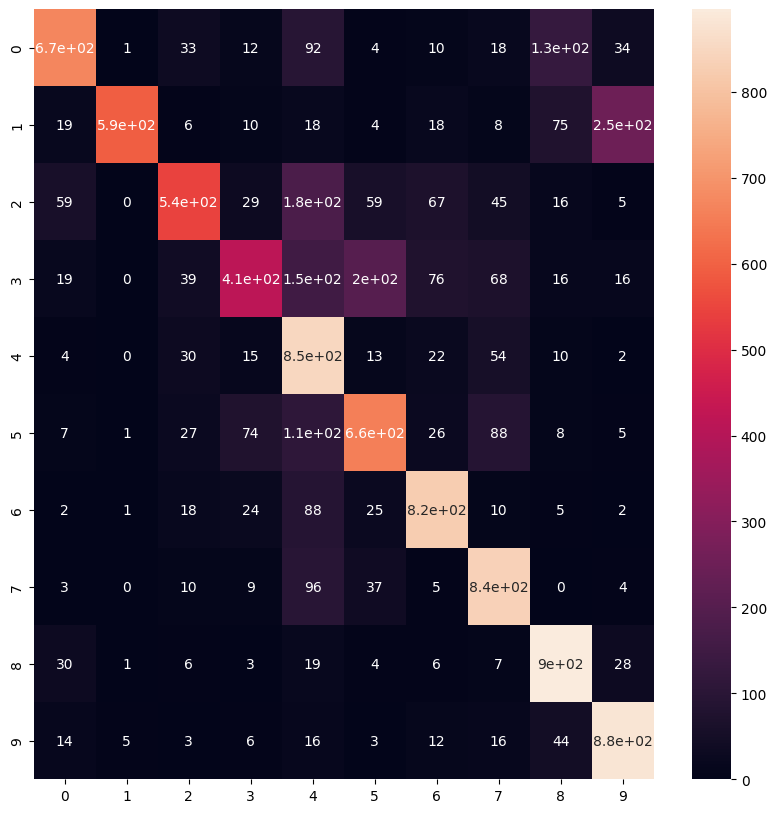

In [87]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
cm
plt.figure(figsize = (10,10))
sns.heatmap(cm, annot = True)

#Saving model


In [88]:
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
  os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Data augmentation

In [89]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_test = X_test.astype('float32')
X_train = X_train.astype('float32')

In [90]:
X_train.shape

(50000, 32, 32, 3)

In [91]:
n = 20
x_train_sample = X_train[:n]
x_train_sample.shape

(20, 32, 32, 3)

In [92]:
dataget_train = ImageDataGenerator(rotation_range = 90)
dataget_train = ImageDataGenerator(vertical_flip=True)
dataget_train = ImageDataGenerator(height_shift_range=0.5)
#dataget_train = ImageDataGenerator(brightness_range=(1,5))
dataget_train.fit(x_train_sample)

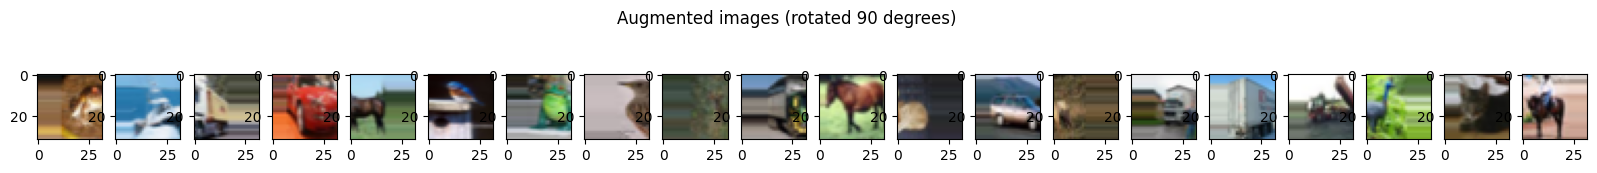

In [93]:
 from PIL import Image


fig = plt.figure(figsize=(20, 2))

for x_batch in dataget_train.flow(x_train_sample, batch_size=n):
    for i in range(0, n):
        ax = fig.add_subplot(1, n, 1 + i)
        image = Image.fromarray(np.uint8(x_batch[i]))
        ax.imshow(image)

    fig.suptitle('Augmented images (rotated 90 degrees)')
    plt.show()
    break


Model training using data augmentation

In [94]:
datagen = ImageDataGenerator(rotation_range = 90,
                             vertical_flip=True,
                             width_shift_range=0.5,
                             horizontal_flip=True)

In [95]:
datagen.fit(X_train)

In [96]:
cnn_model.fit_generator(datagen.flow(X_train, y_train, batch_size = 32), epochs = 2)

Epoch 1/2


<ipython-input-96-7c51626cc5e7>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn_model.fit_generator(datagen.flow(X_train, y_train, batch_size = 32), epochs = 2)


1563/1563 [==============================] - 37s 23ms/step - loss: 124.4784 - accuracy: 0.0013
Epoch 2/2
1563/1563 [==============================] - 36s 23ms/step - loss: 104.2058 - accuracy: 0.0000e+00


In [98]:
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
  os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model_Augmentation.h5')
cnn_model.save(model_path)